diante dessa imensa quantidade de dados, visualizar eles é um dos principais objetivos

# Ideias de representacoes graficas e tabelas sobre os dados

- Mapa de calor com as regioes do brasil, de acordo com a bilheteria total de essas regioes, para comparar quais as regies que mais assistiram filmes em 2023
- Uma serie temporal com a quantidade de bilheteria total por dia, permite ter uma visao geral de como varia a compra de bilheteria ao longo do ano, marcando o dia de maior bilheteria de cada mes QUASE FEITO
- Historiagrama da bilheteria total mensal
- Tabela com o ranking dos 10 filmes com mais bilheteria em 2023 FEITO
- Tabela com o ranring dos 10 filmes com menos bilheteria em 2023 FEITO

# Funcoes basicas para carregar os dados

In [111]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
def carrega_tabela(database, tabela):
    '''
    Carrega uma tabela de um banco de dados 
    SQLite em um DataFrame do Pandas.
    Parâmetros:
    database: str - Caminho para o arquivo do banco de dados SQLite.
    tabela: str - Nome da tabela a ser carregada.
    '''
    with sqlite3.connect(database) as conn:
        query = f"SELECT * FROM {tabela}"
        df = pd.read_sql_query(query, conn)
    return df

In [ ]:
def lista_tabelas(db_filename):
    '''
    Lista todas as tabelas em um banco de dados SQLite.
    Parâmetros:
    db_filename: str - Caminho para o arquivo do banco de dados SQLite.
    Retorna:
    DataFrame com os nomes das tabelas e suas contagens de linhas.
    '''
    # Connect to the SQLite database
    # conn = sqlite3.connect(db_filename)
    with sqlite3.connect(db_filename) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()

        table_row_counts = []
        for table in tables:
            table_name = table[0]
            query = f"SELECT COUNT(*) FROM {table_name};"
            cursor.execute(query)
            row_count = cursor.fetchone()[0]
            table_row_counts.append({"Table": table_name, "Row_Count": row_count})

        return pd.DataFrame(table_row_counts)

# Navegando os dados

In [ ]:
sessao = carrega_tabela("bilheteria.db", "sessao")
sessao


In [ ]:
sala = carrega_tabela("bilheteria.db","sala")
sala

In [ ]:
filme = carrega_tabela("bilheteria.db","filme")
filme

In [ ]:
complexo = carrega_tabela("bilheteria.db","complexo")
complexo

# Tabelas ranking

In [ ]:
filme_bilhe = sessao.groupby("filme_id")["publico"].sum().reset_index()
filme_sessoes = sessao["filme_id"].value_counts().reset_index()
filme_nome = filme[["id","titulo_original"]].rename(columns={"id":"filme_id"})

filmes_total = pd.merge(filme_bilhe, filme_sessoes).merge(filme_nome).rename(columns={"count":"numero_sessoes","publico":"bilheteria_total"})

filmes10_com_menor_bilheteria = filmes_total.sort_values(by="bilheteria_total").head(10)
filmes10_com_maior_bilheteria = filmes_total.sort_values(by="bilheteria_total", ascending=False).head(10)

In [88]:
filmes10_com_maior_bilheteria

,filme_id,bilheteria_total,numero_sessoes,titulo_original
398,399,10238598,56364,BARBIE
323,324,6235953,64425,THE SUPER MARIO BROS. MOVIE
328,329,6132354,50614,FAST X
268,269,5631389,65808,AVATAR: THE WAY OF WATER
255,256,5358525,70676,PUSS IN BOOTS: THE LAST WISH
362,363,4211764,40509,GUARDIANS OF THE GALAXY VOL. 3
359,360,3987722,41205,THE LITTLE MERMAID
388,389,3985017,49623,ELEMENTAL
343,344,3328797,36391,SPIDER-MAN: ACROSS THE SPIDER-VERSE
454,455,2839181,36641,THE NUN 2


In [89]:
filmes10_com_menor_bilheteria

,filme_id,bilheteria_total,numero_sessoes,titulo_original
257,258,1,1,UNE FEMME DU MONDE
33,34,3,2,PEQUENOS GUERREIROS
46,47,4,2,BALA SEM NOME
9,10,5,4,MIRANTE
222,223,5,1,THE ROUNDUP
243,244,5,2,WHITE NOISE
199,200,7,1,DEMON SLAYER: MUGEN TRAIN
239,240,8,2,FOURMI
32,33,8,1,MIÚDA E O GUARDA-CHUVA
25,26,9,1,ALÉM DA LENDA - FILME


# Numero de bilheteria por dia

In [143]:
bilheteria_por_dia = sessao.groupby("data_exibicao")["publico"].sum().reset_index()

bilheteria_por_dia["data_exibicao"] = pd.to_datetime(bilheteria_por_dia["data_exibicao"], format="%d/%m/%Y")
bilheteria_por_dia = bilheteria_por_dia.sort_values(by="data_exibicao").reset_index(drop=True)
bilheteria_por_dia

,data_exibicao,publico
0,2023-01-01,129090
1,2023-01-02,441783
2,2023-01-03,399118
3,2023-01-04,442166
4,2023-01-05,335396
...,...,...
360,2023-12-27,323521
361,2023-12-28,338424
362,2023-12-29,266269
363,2023-12-30,276873


Text(0, 0.5, 'Bilheteria')

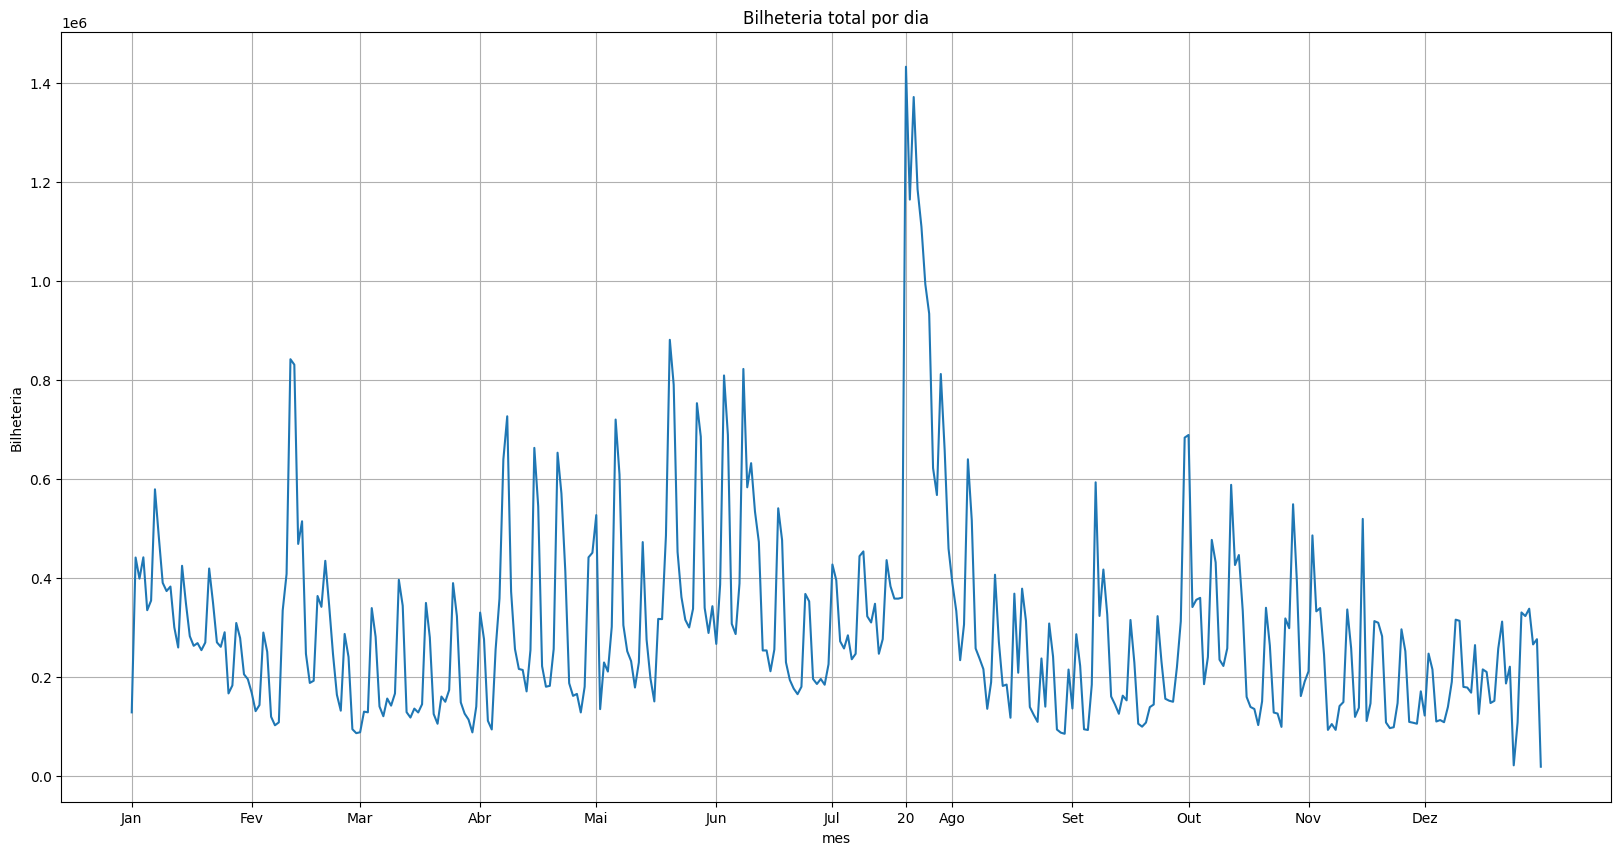

In [147]:
# datas = pd.date_range(start="2023-01-01", periods=365)
plt.figure(figsize=(20,10))
plt.plot(range(1,366),bilheteria_por_dia["publico"])

dias_inicio_mes = [1, 32, 60, 91, 121, 152, 182, 201, 213, 244, 274, 305, 335]
nomes_meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul","20", "Ago", "Set", "Out", "Nov", "Dez"]

plt.xticks(ticks=dias_inicio_mes, labels=nomes_meses)
plt.grid()

plt.title("Bilheteria total por dia")
plt.xlabel("mes")
plt.ylabel("Bilheteria")